In [1]:
%matplotlib inline

import cv2
print(cv2.__version__)
import matplotlib.pyplot as plt
from IPython import display
import numpy as np


4.1.1


In [2]:
vc = cv2.VideoCapture(0)
vc.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
vc.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

True

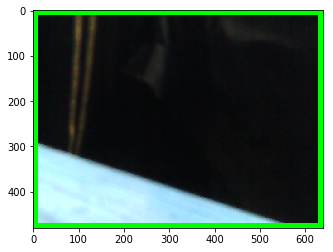

111111


In [ ]:
if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    plt.imshow(frame)
    frame = cv2.cvtColor(frame, cv2.cv2.COLOR_BGR2RGB)
    webcam_preview = plt.imshow(frame)
else:
    is_capturing = False

while is_capturing:
    try:   # Lookout for a keyboardInterrupt to stop the script
        is_capturing, frame = vc.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)    # makes the blues image look real colored
        blurred = cv2.GaussianBlur(gray, (5, 5), 0) 
        canny = cv2.Canny(blurred, 0, 20)
        
        #result = np.hstack([frame, canny])
        kernel = np.ones((1, 20), np.uint8) #設定卷積核 (高, 寬)
        dilation = cv2.dilate(canny,kernel,iterations = 1)

        dst = 255 - dilation #反白
        kernel = np.ones((50,50), np.uint8) 
        morph_o = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel) #影象開運算-去除躁點

        kernel = np.ones((1, 300), np.uint8) #設定卷積核 (高, 寬)
        dilation = cv2.dilate(morph_o,kernel,iterations=1)
        contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

        c = max(contours, key = cv2.contourArea)
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),20)
        
        print("111111")
        webcam_preview.set_data(frame)
        plt.draw()        
        display.clear_output(wait=True)
        display.display(plt.gcf())
    except KeyboardInterrupt:
        vc.release()

In [ ]:
q